# Project Overview (problem statement)
This project analyzes aviation accident data from the National Transportation Safety Board (NTSB) between 1962 and 2023.  
Our goal is to help a business stakeholder identify the safest aircraft makes and models for expanding into commercial and private aviation.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("AviationData.csv",encoding="latin-1")
df


C:\Users\betty\AppData\Local\Temp\ipykernel_10876\3341414809.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv",encoding="latin-1")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


We have loaded the aviation dataset, which contains accident and incident records from 1962 to 2023
we are using 'latin' encoding to properly handle special characters in the data set.
we have also called the df to explore how the data set looks like.


In [3]:
df.shape
df.head()
df.columns.tolist()

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

## Select columns that are needed
The data set has 88889 rows × 31 columns but for the purpose of our risk analysis we will only focus on the ones that are most related to accident serveritu and aircraft information.
we will be using
- make
- model
-Injury.Severity
-Weather.Condition
-Aircraft.damage
-Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.injuries, Total uninjuired
-Broad.phase.of.flight
-investigation type
-engine type
We will also remove any entries with missing values



In [4]:
required_cols = ['Make','Model', 'Injury.Severity', 'Aircraft.damage',
   'Total.Serious.Injuries', 'Total.Fatal.Injuries', 'Total.Uninjured',
   'Weather.Condition', 'Broad.phase.of.flight',
    'Investigation.Type','Engine.Type']
#creating our subset that we will be using as our data frame
aviation_df = df[required_cols]
aviation_df.head()
aviation_df.shape


(88889, 11)

In [5]:
# check missing values
aviation_df.isnull().sum()

Make                         63
Model                        92
Injury.Severity            1000
Aircraft.damage            3194
Total.Serious.Injuries    12510
Total.Fatal.Injuries      11401
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Investigation.Type            0
Engine.Type                7096
dtype: int64

We are going to handle missing values.
For missing values in make, model and injury severity we are going to drop the rows. Since the have critical information for the other columns we will fill them.

In [6]:
# dropping rows where Make,Model and injury severity are missing.
aviation_df = aviation_df.dropna()

#aviation_df = aviation_df.dropna(subset=['Make', 'Model', 'Injury.Severity','Aircraft.damage' ])
aviation_df


# Filling other missing values with 'Unknown'
#aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].fillna('Unknown')
#aviation_df['Broad.phase.of.flight'] = aviation_df['Broad.phase.of.flight'].fillna('Unknown')
#aviation_df['Investigation.Type'] = aviation_df['Investigation.Type'].fillna('Unknown')
#aviation_df['Engine.Type'] = aviation_df['Engine.Type'].fillna('Unknown')

# Filling injury counts with 0 where missing
#aviation_df['Total.Fatal.Injuries'] = aviation_df['Total.Fatal.Injuries'].fillna(0)
#aviation_df['Total.Serious.Injuries'] = aviation_df['Total.Serious.Injuries'].fillna(0)
#aviation_df['Total.Uninjured'] = aviation_df['Total.Uninjured'].fillna(0)




aviation_df.isnull().sum()

Make                      0
Model                     0
Injury.Severity           0
Aircraft.damage           0
Total.Serious.Injuries    0
Total.Fatal.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Investigation.Type        0
Engine.Type               0
dtype: int64

# Analysis 1
Our data set is now clean and ready for analysis.
Here we want to identify the make and the model with the fewest fatalities


In [7]:


make_accidents = aviation_df['Make'].value_counts()

# Filter makes with at least 50 accidents
common_makes = make_accidents[make_accidents > 500].index

# Filter original dataframe to only include common makes
aviation_df = aviation_df[aviation_df['Make'].isin(common_makes)]
aviation_df
# Group by Make and sum fatal injuries
safest_make = aviation_df.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values()

# Get Top 10 Safest Makes (lowest total fatalities)
safest_makes =safest_make.head(10)

safest_makes


Make
Hughes       108.0
Grumman      130.0
Bellanca     272.0
Mooney       407.0
Bell         511.0
Boeing       802.0
Beech       1954.0
Piper       3925.0
Cessna      5100.0
Name: Total.Fatal.Injuries, dtype: float64

Now we are going to plot our bar graph inorder to see the manufacturer with the lowest fatilities.
We are going to import matplot as plt and seaborn as sn

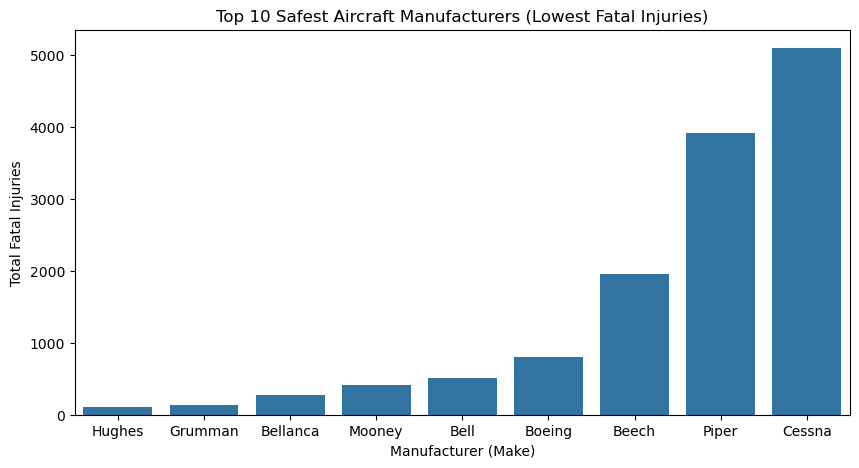

In [8]:
# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=safest_makes.index, y=safest_makes.values )
plt.title('Top 10 Safest Aircraft Manufacturers (Lowest Fatal Injuries)')
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Manufacturer (Make)')
plt.show()



# Recommendation
The company should initially focus on  fleet purchase on these manufacturers i.e, (Hughes, Grumman, Mooney,Bell,Boeing, Beech, Piper, Cessna) since these are the most common manufacturing company with low number of fatilities..

They have demonstrated better safety over the years.

# Analysis 2
We want to identify the best aircraft types to start with
we are going to find which engine type are involved in fewer accidents and less severe damage

In [9]:
# Group by Engine Type
engine_accidents = aviation_df.groupby('Engine.Type')['Investigation.Type'].count().sort_values(ascending=False)
engine_accidents



Engine.Type
Reciprocating    31855
Turbo Shaft       1207
Turbo Prop         522
Turbo Fan          331
Turbo Jet          105
Unknown             23
Name: Investigation.Type, dtype: int64

We are now going to plot our bar chart to compare the engine type with the number of accident occured


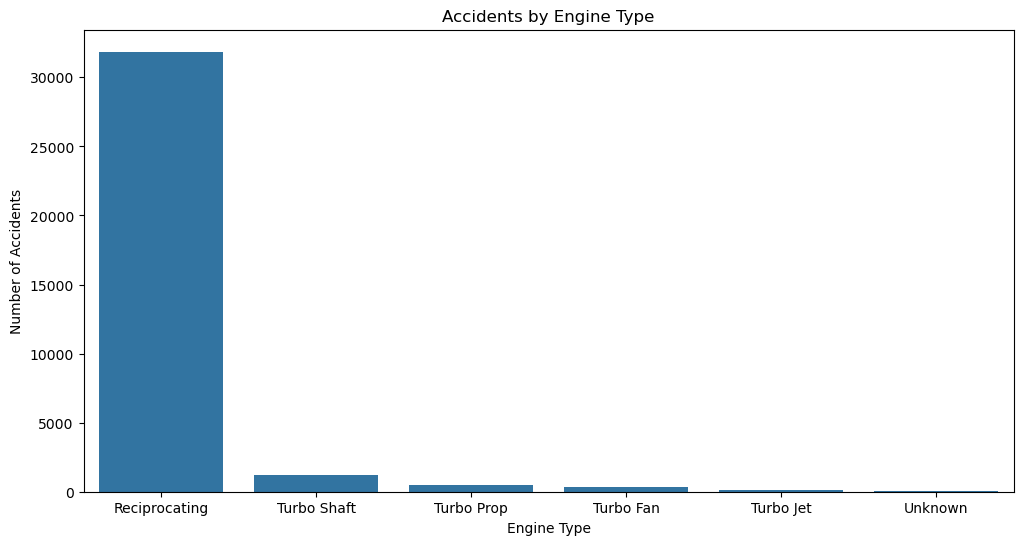

In [10]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=engine_accidents.index, y=engine_accidents.values)
plt.title('Accidents by Engine Type')
plt.ylabel('Number of Accidents')
plt.xlabel('Engine Type')
plt.show()

# Recommendation
Company should consider purchasing Aeroplanes with Turbo Jet engine type since these types show lower accident rates and are ideal for building operational experience.

# Anylsis 3
We are going to understand, which weather conditions is  most risky.


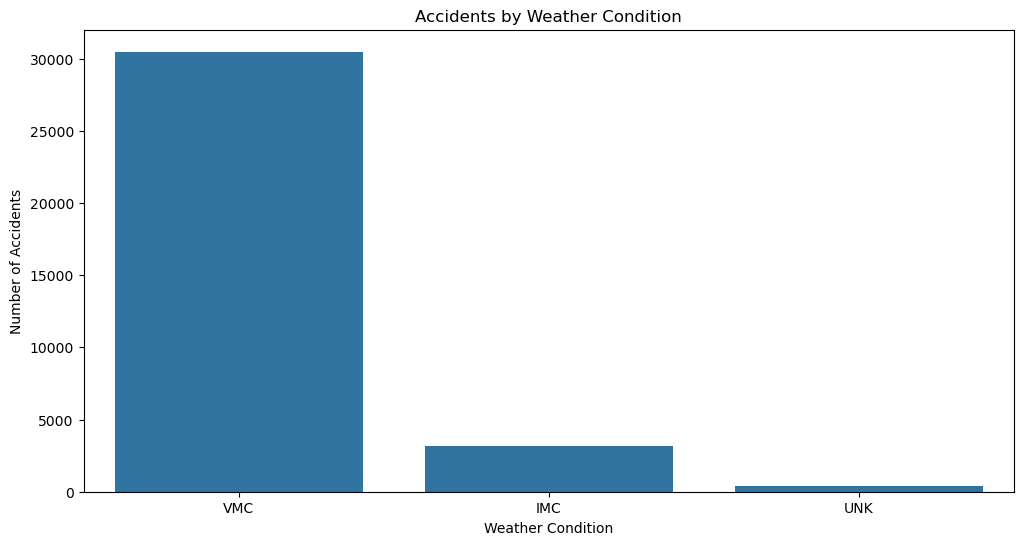

In [11]:
# Weather Condition distribution
weather_condition = aviation_df['Weather.Condition'].value_counts()
weather_condition

# Plot Weather Condition
plt.figure(figsize=(12,6))
sns.barplot(x =weather_condition.index,y=weather_condition.values)
plt.title('Accidents by Weather Condition')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather Condition')
plt.show()


we are going to plot our last visualization 
we want to understand the phase of flight that many accidents happen for precaution purposes

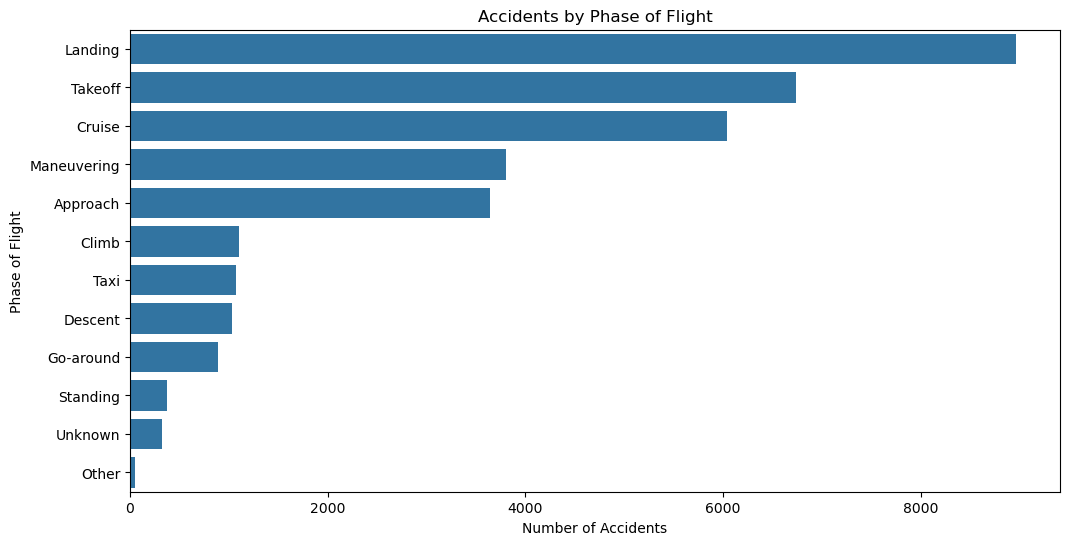

In [12]:
# Broad Phase of Flight distribution
phase_of_flight = aviation_df['Broad.phase.of.flight'].value_counts()

# Plot Phase of Flight
plt.figure(figsize=(12,6))
sns.barplot(x=phase_of_flight.values, y=phase_of_flight.index)
plt.title('Accidents by Phase of Flight')
plt.xlabel('Number of Accidents')
plt.ylabel('Phase of Flight')
plt.show()


# Recommendation
 The company should embrace Operational Risk Management by Avoid operations in adverse weather "VMC" conditions.

Additionally they should not that Takeoff and Landing phases are highest risk  and therefore they should invest in specialized pilot training for these stages.

# Tableau Visualization
We are going to create a clean csv data that include data for all the plots in our notebook


In [13]:
aviation_df.to_csv('aviation_clean.csv', index=False)

